In [5]:
import os
directory = f'/Users/lilimatic/greenspace'
os.chdir(directory)

from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier


from sklearn.model_selection import train_test_split
from sklearn.utils.class_weight import compute_sample_weight

#AUC and ROC curve 
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

#from sklearn.metrics import classification_report, confusion_matrix
import shap

import statsmodels.api as sm 

/Users/lilimatic/opt/anaconda3/lib/python3.8/site-packages/numba/core/types/__init__.py:108: FutureWarning: In the future `np.long` will be defined as the corresponding NumPy scalar.
  long_ = _make_signed(np.long)


AttributeError: module 'numpy' has no attribute 'long'

In [6]:
from functions.ml_data import *

df_copy = df.copy()

In [7]:
rename

{'age': 'Age ',
 'gender': 'Gender',
 'municipality': 'Municipality in which you visit parks or squares: (circle all that apply)',
 'precovid': 'How often have you visited parks or squares in 2019 during the day?',
 'freqency': 'Regarding the parks or squares that you have visited in 2019, did you visit parks or squares more frequently during the day before the corona virus outbreak?',
 'time': 'How much time do you usually spend in parks or squares since the corona virus outbreak in Serbia?',
 'activity': 'When you are in parks or squares, what do you usually do (circle all that apply)?',
 'socializing': 'When visiting parks or squares you are often (circle all that apply):',
 'distancing': 'While using parks or squares, do you behave according to social distancing regulations standing a minimum of 2.0 meters apart from other people?',
 'physicalsafety': 'Would you feel physically safe if there was monitoring of park or square usage that you could access through your phone?',
 'covids

In [3]:
df.head()

,age,gender,precovid,frequency,time,socializing,distancing,safety,Novi Beograd,Zvezdara,Stari gradmore than 5 people,Zemun,Savski venac,Stari grad,Vračar,Consumption,Walking the dog,Spending time with friends,Sitting and relaxing,Physical activity
0,19.5,0,2,3,1.00,1,0,1,1,0,0,0,0,1,1,0,0,1,1,1
1,32.5,0,1,3,0.50,1,1,1,0,0,0,0,0,1,1,0,0,1,1,1
2,52.5,1,1,1,0.50,0,1,1,0,0,1,0,0,1,1,0,1,0,0,1
3,19.5,1,1,1,0.75,1,1,0,0,1,0,0,0,1,1,1,1,1,1,0
4,52.5,1,1,3,0.25,1,1,0,0,0,0,0,0,0,1,0,0,1,0,0


In [4]:
df.dtypes

age                             float64
gender                            int64
precovid                          int64
frequency                         int64
time                            float64
socializing                       int64
distancing                        int64
safety                            int64
Novi Beograd                      int64
Zvezdara                          int64
Stari gradmore than 5 people      int64
Zemun                             int64
Savski venac                      int64
Stari grad                        int64
Vračar                            int64
Consumption                       int64
Walking the dog                   int64
Spending time with friends        int64
Sitting and relaxing              int64
Physical activity                 int64
dtype: object

In [5]:
df.frequency.unique()

array([3, 1, 2, 0])

In [6]:
y = 'safety'

<AxesSubplot:>

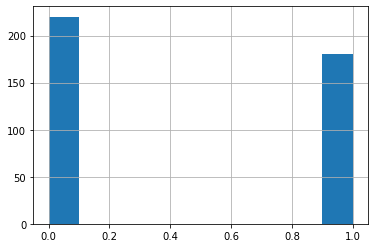

In [7]:
df.safety.hist()

In [8]:
X_train, X_test, y_train, y_test = train_test_split(df_copy.loc[:, df_copy.columns != y], \
                                                    df_copy[y], test_size=0.25)

In [9]:
sample_weights = compute_sample_weight(
    class_weight='balanced',
    y=y_train #provide your own target name
)

model = XGBClassifier(n_estimators=5, max_depth=5, learning_rate=1e-4, objective='binary:logistic')

log_reg = LogisticRegression()

rf = RandomForestClassifier()

#Model fit 
model.fit(X_train, y_train)

log_reg.fit(X_train, y_train)

rf.fit(X_train, y_train)

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


RandomForestClassifier()

In [10]:
pred_prob1 = model.predict_proba(X_test)
pred_prob2 = log_reg.predict_proba(X_test)
pred_prob3 = rf.predict_proba(X_test)

In [11]:
fpr1, tpr1, thresh1 = roc_curve(y_test, pred_prob1[:,1], pos_label=1)
fpr2, tpr2, thresh2 = roc_curve(y_test, pred_prob2[:,1], pos_label=1)
fpr3, tpr3, thresh3 = roc_curve(y_test, pred_prob3[:,1], pos_label=1)

In [12]:
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

In [13]:
# auc scores

auc_score1 = roc_auc_score(y_test, pred_prob1[:,1])
auc_score2 = roc_auc_score(y_test, pred_prob2[:,1])
auc_score3 = roc_auc_score(y_test, pred_prob3[:,1])

print(auc_score1, auc_score2,auc_score3)

0.6058423369347739 0.664265706282513 0.710484193677471


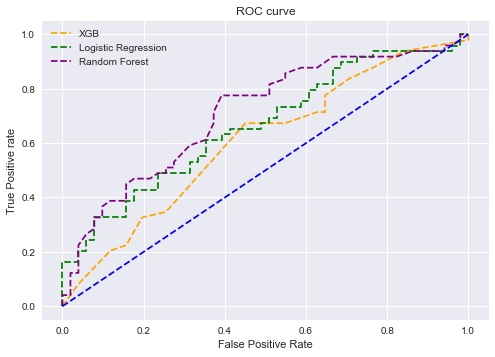

In [14]:
plt.style.use('seaborn')

# plot roc curves
plt.plot(fpr1, tpr1, linestyle='--',color='orange', label='XGB')
plt.plot(fpr2, tpr2, linestyle='--',color='green', label='Logistic Regression')
plt.plot(fpr3, tpr3, linestyle='--',color='purple', label='Random Forest')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show();

In [15]:
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test)

[17:39:57] WARNING: /Users/runner/work/xgboost/xgboost/src/c_api/c_api.cc:1240: Saving into deprecated binary model format, please consider using `json` or `ubj`. Model format will default to JSON in XGBoost 2.2 if not specified.


<BarContainer object of 19 artists>

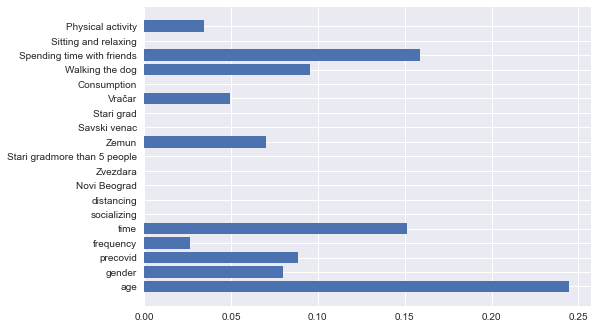

In [16]:
plt.barh(X_train.columns, model.feature_importances_)

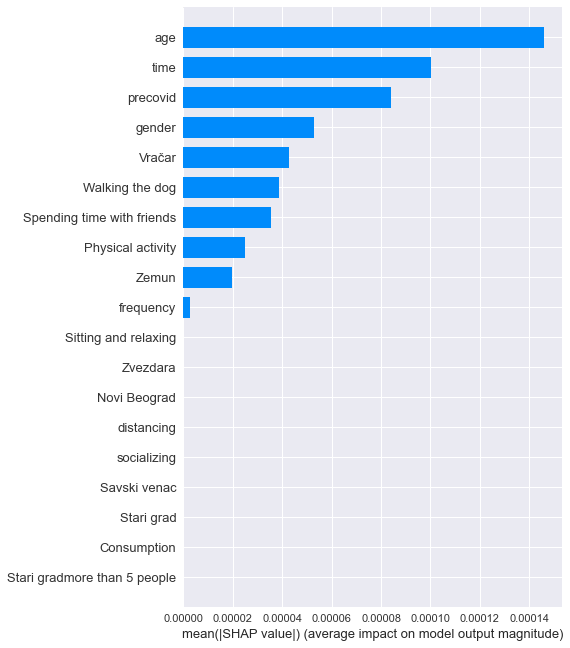

In [17]:
shap.summary_plot(shap_values, X_test, plot_type="bar")

<AxesSubplot:>

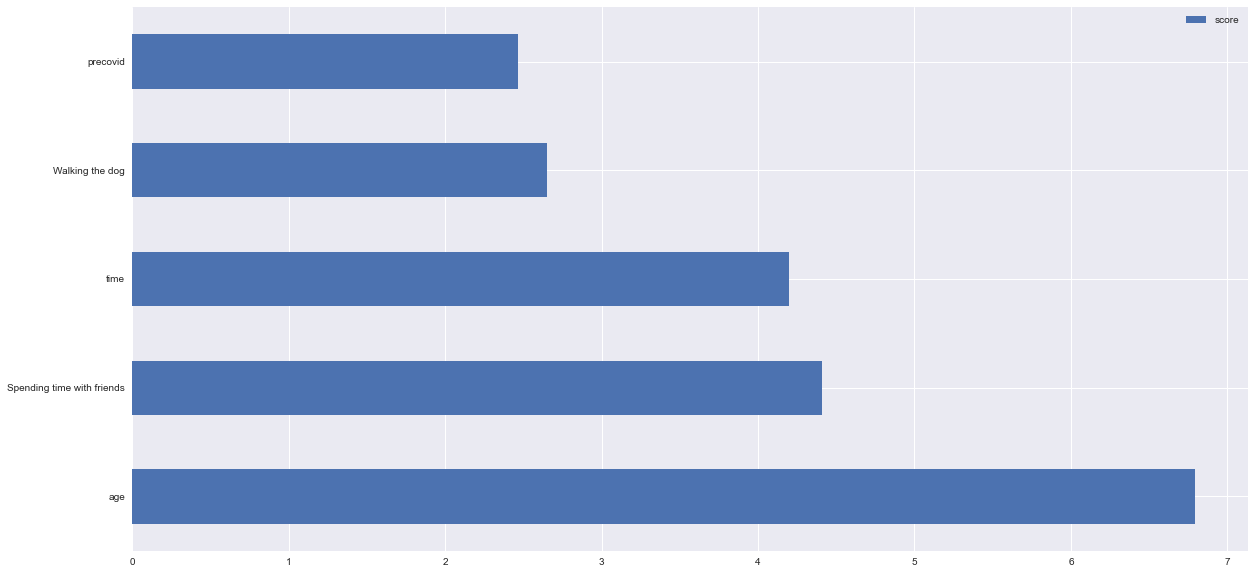

In [18]:
feature_important = model.get_booster().get_score(importance_type='gain')
keys = list(feature_important.keys())
values = list(feature_important.values())

data = pd.DataFrame(data=values, index=keys, columns=["score"]).sort_values(by = "score", ascending=False)
data.nlargest(5, columns="score").plot(kind='barh', figsize = (20,10)) ## plot top 40 features

In [19]:
#Prediction

In [20]:
df.columns

Index(['age', 'gender', 'precovid', 'frequency', 'time', 'socializing',
       'distancing', 'safety', 'Novi Beograd', 'Zvezdara',
       'Stari gradmore than 5 people', 'Zemun', 'Savski venac', 'Stari grad',
       'Vračar', 'Consumption', 'Walking the dog',
       'Spending time with friends', 'Sitting and relaxing',
       'Physical activity'],
      dtype='object')

In [21]:
#Current variables : 'age','location','socializing','time','frequency',

#out:'precovid',,'Consumption'

#negative:'Walking the dog',

#,'location'

df_try = df[['age','socializing','time','frequency',#'location',
             'gender','Spending time with friends','Sitting and relaxing','Physical activity','Zemun']] #,

In [22]:
X_train, X_test, y_train, y_test = train_test_split(df_try.loc[:, df_try.columns != y],df[y],test_size=0.25)
 

In [23]:
#Model fit 
model.fit(X_train, y_train)

log_reg.fit(X_train, y_train)

rf.fit(X_train, y_train)

RandomForestClassifier()

In [24]:
pred_prob1 = model.predict_proba(X_test)
pred_prob2 = log_reg.predict_proba(X_test)
pred_prob3 = rf.predict_proba(X_test)

In [25]:
fpr1, tpr1, thresh1 = roc_curve(y_test, pred_prob1[:,1], pos_label=1)
fpr2, tpr2, thresh2 = roc_curve(y_test, pred_prob2[:,1], pos_label=1)
fpr3, tpr3, thresh3 = roc_curve(y_test, pred_prob3[:,1], pos_label=1)

In [26]:
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

In [27]:
# auc scores

auc_score1 = roc_auc_score(y_test, pred_prob1[:,1])
auc_score2 = roc_auc_score(y_test, pred_prob2[:,1])
auc_score3 = roc_auc_score(y_test, pred_prob3[:,1])

print(auc_score1, auc_score2,auc_score3)

0.6501010101010101 0.5929292929292929 0.6864646464646464


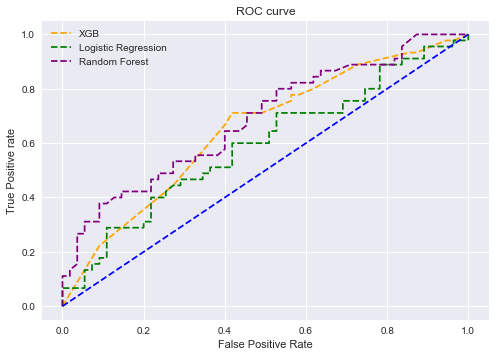

In [28]:
plt.style.use('seaborn')

# plot roc curves
plt.plot(fpr1, tpr1, linestyle='--',color='orange', label='XGB')
plt.plot(fpr2, tpr2, linestyle='--',color='green', label='Logistic Regression')
plt.plot(fpr3, tpr3, linestyle='--',color='purple', label='Random Forest')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show();

In [29]:
log_reg = sm.Logit(y_train, X_train).fit()

Optimization terminated successfully.
         Current function value: 0.649017
         Iterations 5


In [30]:
print(log_reg.summary()) 

                           Logit Regression Results                           
Dep. Variable:                 safety   No. Observations:                  300
Model:                          Logit   Df Residuals:                      291
Method:                           MLE   Df Model:                            8
Date:                Wed, 27 Dec 2023   Pseudo R-squ.:                 0.05685
Time:                        17:39:59   Log-Likelihood:                -194.71
converged:                       True   LL-Null:                       -206.44
Covariance Type:            nonrobust   LLR p-value:                  0.002807
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
age                            0.0266      0.008      3.357      0.001       0.011       0.042
socializing                    0.0349      0.299      0.117      0.907      -0.550 